In [572]:
import numpy as np
import math

In [573]:
def tanh(x):
    return np.tanh(x)
def softmax(x):
#     exp = np.exp(x)
    exp = np.exp(x-x.max()) 
    #防止指数爆炸
    #Prevent exponential explosion
    
    return exp/exp.sum()

In [574]:
dimensions = [28*28 , 10]      #规模定义(scale)
activation = [tanh , softmax]  #激活函数(Activation Function)
distribution = [
    {'b':[0,0]},
    {'b':[0,0],'w':[-math.sqrt(6/(dimensions[0]+dimensions[1])),math.sqrt(6/(dimensions[0]+dimensions[1]))]}   
    #防止激活函数饱和
    #Prevent activation function saturation
]

In [575]:
def init_parameters_b(layer):      #初始化b (initialize b)
    dist = distribution[layer]['b']
    return np.random.rand(dimensions[layer])*(dist[1]-dist[0])+dist[0]
def init_parameters_w(layer):     #初始化w (initialize w)
    dist = distribution[layer]['w']
    return np.random.rand(dimensions[layer-1],dimensions[layer])*(dist[1]-dist[0])+dist[0]
def init_parameters():
    parameters = []
    for i in range(len(distribution)):
        layer_parameters = {}
        for j in distribution[i].keys():
            if j == 'b':
                layer_parameters['b'] = init_parameters_b(i)
            if j == 'w':
                layer_parameters['w'] = init_parameters_w(i)
                continue
        parameters.append(layer_parameters)
    return parameters

In [576]:
parameters = init_parameters()

In [577]:
def predict(img , parameters):
    # l0 = A(data + b0)
    l0_in = img + parameters[0]['b']
    l0_out = activation[0](l0_in)
    
    #output = A'(vec(l0*w1) + b1)
    l1_in = np.dot(l0_out , parameters[1]['w']) + parameters[1]['b']
    l1_out = activation[1](l1_in)
    
    return l1_out

In [578]:
#测试(test)
predict(np.random.rand(784),parameters)#.argmax() # 最大值位置

array([0.01898631, 0.09921247, 0.04481209, 0.05991421, 0.29980984,
       0.07624215, 0.16302448, 0.05564501, 0.10775689, 0.07459655])

In [579]:
from pathlib import Path

In [580]:
dataset_path = Path('D:/M')# 根目录 (root directory)
train_img_path = dataset_path/'train-images.idx3-ubyte'
train_lab_path = dataset_path/'train-labels.idx1-ubyte'
test_img_path = dataset_path/'t10k-images.idx3-ubyte'
test_lab_path = dataset_path/'t10k-labels.idx1-ubyte'

In [581]:
import struct

In [582]:
train_num=50000
valid_num=10000
test_num=10000

with open(train_img_path,'rb') as f:
    struct.unpack('>4i',f.read(16))  # 4 个 integer
    tmp_img=np.fromfile(f,dtype=np.uint8).reshape(-1,28*28)/255         # u:无符号  int:整形   8:1字节
    train_img=tmp_img[:train_num]
    valid_img=tmp_img[train_num:]
with open(test_img_path,'rb') as f:
    struct.unpack('>4i',f.read(16))
    test_img=np.fromfile(f,dtype=np.uint8).reshape(-1,28*28)/255     # /255 -> 防止二值化
    # Prevent binarization 防止二值化

with open(train_lab_path,'rb') as f:
    struct.unpack('>2i',f.read(8))
    tmp_lab=np.fromfile(f,dtype=np.uint8)
    train_lab=tmp_lab[:train_num]
    valid_lab=tmp_lab[train_num:]
    
with open(test_lab_path,'rb') as f:
    struct.unpack('>2i',f.read(8))
    test_lab=np.fromfile(f,dtype=np.uint8)

In [583]:
#train_img[0].reshape(28,28)

In [584]:
import matplotlib.pyplot as plt

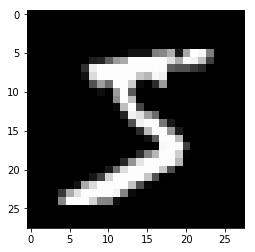

In [585]:
img = train_img[0].reshape(28,28)
plt.imshow(img,cmap = 'gray')

In [586]:
def show_train(index):
    plt.imshow(train_img[index].reshape(28,28),cmap='gray')
    print('label : {}'.format(train_lab[index]))
def show_valid(index): #验证集
    plt.imshow(valid_img[index].reshape(28,28),cmap='gray')
    print('label : {}'.format(valid_lab[index]))
    '''
    Que: Why is there one more valid(验证集)?
    Ans：Prevent overfitting(过拟合)
    '''
    
def show_test(index):
    plt.imshow(test_img[index].reshape(28,28),cmap='gray')
    print('label : {}'.format(test_lab[index]))
    
    
    '''
    训练集：训练模型
    验证集：对模型不可见，对自己可见
    测试集：所有不可见，不适合预测过多次，否则失效(过拟合) => 最终测试
    
    **过拟合**：对于训练集样本，拟合程度很好，但对于测试集样本，预测效果差 (在验证集中表现非常好，但是测试时完全崩溃的现象) 

    Training set: training model
    Validation set: invisible to model, visible to self
    Test set: all invisible, not suitable for multiple predictions, otherwise failure (overfitting)
    ** overfitting ** : for the training set sample, the fitting degree is very good, but for the test set sample, the prediction effect is poor (the performance in the verification set is very good, but the test completely crashes)
    '''

In [587]:
np.outer([1,2,3,4],[1,2,3,4])

array([[ 1,  2,  3,  4],
       [ 2,  4,  6,  8],
       [ 3,  6,  9, 12],
       [ 4,  8, 12, 16]])

In [588]:
#测试
def d_softmax(data):
    sm = softmax(data)
    return np.diag(sm)-np.outer(sm,sm)

def d_tanh(data):
    return 1/(np.cosh(data))**2
    #return np.diag(1/(np.cosh(data))**2)

In [589]:
differential = {softmax:d_softmax,tanh:d_tanh}

In [590]:
d_tanh([1,2,3,4])

array([0.41997434, 0.07065082, 0.00986604, 0.00134095])

In [591]:
d_softmax(np.array([1,2,3,4]))

array([[ 0.03103085, -0.00279373, -0.00759413, -0.02064299],
       [-0.00279373,  0.07955019, -0.02064299, -0.05611347],
       [-0.00759413, -0.02064299,  0.18076935, -0.15253222],
       [-0.02064299, -0.05611347, -0.15253222,  0.22928869]])

In [592]:
# softmax
h=1e-6
func=softmax
input_len=4
for i in range(input_len):
    test_input=np.random.rand(input_len)
    derivative=differential[func](test_input)
    value1=func(test_input)
    test_input[i]+=h
    value2=func(test_input)
#     print((value2-value1)/h)
#     print(derivative[i])
    print(derivative[i]-(value2-value1)/h)

[-4.73825368e-08  1.55529246e-08  1.71602916e-08  1.46693206e-08]
[ 9.99691165e-09 -4.64799127e-08  1.74726183e-08  1.90103827e-08]
[ 1.29223372e-08  2.37585304e-08 -4.72397742e-08  1.08087068e-08]
[ 1.47842944e-08  1.61833861e-08  1.61668727e-08 -4.71900643e-08]


In [593]:
# tanh
h=0.1e-6
func=tanh
input_len=4
for i in range(input_len):
    test_input=np.random.rand(input_len)
    derivative=differential[func](test_input)
    value1=func(test_input)
    test_input[i]+=h
    value2=func(test_input)
#     print((value2-value1)/h)
#     print(derivative[i])
    print(derivative[i]-((value2-value1)/h)[i])

3.6061279629073795e-08
5.3164307400876964e-09
3.86801948248916e-08
3.7918786222057577e-08


In [594]:
onehot=np.identity(dimensions[-1])

In [595]:
def sqr_loss(img,lab,parameters):    # 图片,对应label,参数
    y_pred=predict(img,parameters)
    y=onehot[lab]
    diff=y-y_pred
    return np.dot(diff,diff)

In [596]:
sqr_loss(train_img[0],train_lab[0],parameters)

0.9649463113955637

In [597]:
def grad_parameters(img,lab,parameters):
    l0_in = img + parameters[0]['b']
    l0_out = activation[0](l0_in)
    l1_in = np.dot(l0_out , parameters[1]['w']) + parameters[1]['b']
    l1_out = activation[1](l1_in)     # 复制上方predict函数
    
    diff = onehot[lab] - l1_out
    act1 = np.dot(differential[activation[1]](l1_in),diff)
    grad_b1 = -2 * act1
    grad_w1 = -2 * np.outer(l0_out,act1)
    grad_b0 = -2 * differential[activation[0]](l0_in) * np.dot(parameters[1]['w'],act1)
    return {'w1':grad_w1,'b1':grad_b1,'b0':grad_b0}

In [598]:
grad_parameters(train_img[2],train_lab[2],init_parameters())

{'w1': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'b1': array([ 0.02620746,  0.00781404,  0.00977071,  0.01006593, -0.19332863,
         0.00625826,  0.00896204,  0.00846535,  0.01403042,  0.10175443]),
 'b0': array([-5.08895188e-03,  9.01622588e-03, -8.84483859e-03, -4.58713117e-03,
        -5.82230159e-03, -2.23077247e-02,  1.08523591e-03, -1.41101156e-03,
         1.10786776e-02, -2.06395669e-02, -6.73169069e-03, -1.66847403e-02,
        -1.57548095e-02,  2.03611463e-02, -4.21893047e-03, -2.06456509e-02,
        -1.21526445e-02,  3.23010674e-03,  1.76333180e-03,  1.02844768e-02,
        -9.73985237e-03, -1.44835246e-02, -2.23488808e-03,  3.92128159e-03,
        -9.68960303e-03, -2.45604099e-03, -5.52009200e-03,  1.89496876e-02,
        -1.00595839e-02, -1.23468488e-02,  2.05520322

In [599]:
# b1
h = 1e-6
for i in range(10):
    img_i = np.random.randint(train_num)
    test_parameters = init_parameters()
    derivative = grad_parameters(train_img[img_i],train_lab[img_i],test_parameters)['b1']
    '''
    随机整数—图片序号
    随机—初始参数
    严格导数
    
    Random integer - picture number
    Randomness - initial parameter
    Strict derivative
    '''
    
    value1 = sqr_loss(train_img[img_i],train_lab[img_i],test_parameters)
    test_parameters[1]['b'][i]+=h
    value2 = sqr_loss(train_img[img_i],train_lab[img_i],test_parameters)
    print (derivative[i] - (value2-value1)/h)    # (value2-value1)/h   get Approximate derivative (近似导数)
    
    
    

-2.14967050861381e-08
-6.228289615994864e-08
6.500050608870822e-08
-2.2246578045004295e-08
-3.231773940820526e-08
-8.296095772158951e-10
-2.1603580806217604e-08
-1.2701196589262609e-08
-6.673975811236077e-09
-1.527530577721814e-08


In [600]:
# w
h=1e-6
grad_list=[]
for i in range(784):
    for j in range(10):
        img_i = np.random.randint(train_num)
        test_parameters = init_parameters()
        derivative = grad_parameters(train_img[img_i],train_lab[img_i],test_parameters)['w1']
        
        value1 = sqr_loss(train_img[img_i],train_lab[img_i],test_parameters)
        test_parameters[1]['w'][i][j]+=h
        value2 = sqr_loss(train_img[img_i],train_lab[img_i],test_parameters)
        
        #print (derivative[i][j] - (value2-value1)/h)
        grad_list.append(derivative[i][j]-(value2-value1)/h)
np.abs(grad_list).max()

4.23453478393121e-08

In [601]:
# b0
h=1e-6
grad_list=[]
for i in range(784):
    img_i = np.random.randint(train_num)
    test_parameters = init_parameters()
    derivative = grad_parameters(train_img[img_i],train_lab[img_i],test_parameters)['b0']

    value1 = sqr_loss(train_img[img_i],train_lab[img_i],test_parameters)
    test_parameters[0]['b'][i]+=h
    value2 = sqr_loss(train_img[img_i],train_lab[img_i],test_parameters)

    #print (derivative[i][j] - (value2-value1)/h)
    grad_list.append(derivative[i]-(value2-value1)/h)
np.abs(grad_list).max()

7.064576350995777e-09

In [602]:
# Accuracy of judgment(判断精确度)
def valid_loss(parameters):
    loss_accu = 0
    for img_i in range(valid_num):
        loss_accu += sqr_loss(valid_img[img_i],valid_lab[img_i],parameters)
    return loss_accu/(valid_num/10000)

def valid_accuracy(parameters):
    correct = [predict(valid_img[img_i],parameters).argmax() == valid_lab[img_i] for img_i in range(valid_num)]
    return correct.count(True)/len(correct)
    
def train_loss(parameters):
    loss_accu = 0
    for img_i in range(train_num):
        loss_accu += sqr_loss(train_img[img_i],train_lab[img_i],parameters)
    return loss_accu/(train_num/10000)

def train_accuracy(parameters):
    correct = [predict(train_img[img_i],parameters).argmax() == train_lab[img_i] for img_i in range(train_num)]
    return correct.count(True)/len(correct)

In [603]:
valid_loss(parameters)

9252.681288659314

In [616]:
valid_accuracy(init_parameters())

0.1022

In [617]:
train_loss(parameters)

2770.1827199163827

In [618]:
train_accuracy(init_parameters())

0.09116

In [605]:
batch_size=100
def train_batch(current_batch,parameters):
    grad_accu=grad_parameters(train_img[current_batch * batch_size + 0],train_lab[current_batch * batch_size + 0],parameters)
    for img_i in range(1,batch_size):
        grad_tmp=grad_parameters(train_img[current_batch * batch_size + img_i],train_lab[current_batch * batch_size + img_i],parameters)
        for key in grad_accu.keys():
            grad_accu[key] += grad_tmp[key]
    
    for key in grad_accu.keys():
        grad_accu[key] /= batch_size

    return grad_accu
# 100为一组,100张图片的平均0

In [606]:
train_batch(0,parameters)

{'w1': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'b1': array([-0.00591166, -0.00381056,  0.00140106, -0.00563384, -0.00290027,
         0.0015815 ,  0.02630939, -0.00379867, -0.001781  , -0.00545594]),
 'b0': array([-1.54046483e-03, -4.48448500e-04,  1.48369717e-03, -3.18201336e-03,
         8.56166686e-04,  1.02719878e-03,  1.43684636e-03, -6.13806755e-04,
        -2.41466273e-03, -9.25935021e-04,  9.03550333e-04, -1.73079831e-03,
        -2.12552024e-03,  1.49486683e-03, -1.27634555e-03, -8.76234325e-04,
        -2.12612563e-03,  1.54050210e-03,  4.64791093e-04,  3.88446607e-04,
        -3.18237612e-03,  2.07021562e-03,  2.37476070e-03, -1.81284937e-03,
         1.54155510e-03, -7.09335710e-04,  6.45688523e-04, -2.61148863e-03,
         1.01931511e-03,  2.20000339e-03,  2.06539986

In [607]:
import copy

In [608]:
def combine_parameters(parameters,grad,learn_rate):
    parameters_tmp = copy.deepcopy(parameters)
    parameters_tmp[0]['b'] -= learn_rate * grad['b0']
    parameters_tmp[1]['b'] -= learn_rate * grad['b1']
    parameters_tmp[1]['w'] -= learn_rate * grad['w1']
    return parameters_tmp
# Pi -> Pi - k▽L

In [609]:
combine_parameters(parameters,train_batch(1,parameters),1)

[{'b': array([ 3.00053447e-03,  4.80875454e-04, -1.49626143e-03,  3.87685086e-03,
          3.58765528e-04, -2.32177555e-03, -1.44921104e-03,  2.25676546e-04,
          1.86973756e-03, -5.62334688e-04, -1.68468599e-03,  2.65975579e-03,
          2.31272173e-03, -3.29871239e-03,  2.74545652e-03,  1.57856298e-03,
          2.00891468e-03, -3.83469794e-04,  3.58619922e-04,  5.45113106e-04,
          2.73216104e-03, -1.61947881e-03, -2.46298832e-03,  3.05867145e-03,
         -2.57957646e-03,  1.41125970e-03, -9.91439368e-04,  1.38954657e-03,
         -5.81730913e-04, -2.59351636e-03, -3.25099015e-03,  2.69202777e-03,
          2.88743820e-03,  2.82695013e-04, -1.10379846e-03, -2.79737844e-03,
         -2.22844202e-04, -2.37746928e-03,  1.65705025e-03, -2.64658220e-03,
          3.93971044e-03,  4.22724502e-03, -3.49100690e-04,  5.86265476e-04,
          8.43677252e-04,  1.60668302e-03,  2.73927837e-03, -7.35733073e-04,
          2.53606165e-03,  4.51754240e-03,  4.75358644e-04,  1.43941408

In [775]:
parameters = init_parameters()

current_epoch = 0
train_loss_list = []
valid_loss_list = []
train_accu_list = []
valid_accu_list = []

In [776]:
# Before the training
valid_accuracy(parameters)

0.1005

In [777]:
# progress bar
from tqdm import tqdm_notebook 

In [778]:
# learn_rate = 1 # 0.5
learn_rate = 10**-0.6
epoch_num = 20 # 10
for epoch in tqdm_notebook(range(epoch_num)):
    for i in range(train_num//batch_size):
#         if i%100 == 99:
#             pass
#             print('running_batch {}/{}'.format(i+1,train_num//batch_size))
        grad_tmp = train_batch(i,parameters)
            #Temporary gradient(临时梯度)

        parameters = combine_parameters(parameters,grad_tmp,learn_rate)   
    current_epoch += 1
    train_loss_list.append(train_loss(parameters))
    valid_loss_list.append(valid_loss(parameters))
    train_accu_list.append(train_accuracy(parameters))
    valid_accu_list.append(valid_accuracy(parameters))

In [779]:
# After the training
valid_accuracy(parameters)

0.9301

In [780]:
#parameters

In [781]:
train_accuracy(parameters)

0.9301

In [782]:
valid_loss(parameters)

1083.4110529611046

In [783]:
train_loss(parameters)

1121.0044086653566

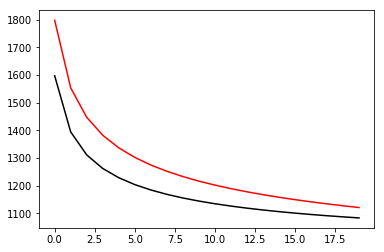

In [784]:
# lower = 0
# plt.plot(valid_loss_list[lower:], color='black', label='validation loss')
plt.plot(valid_loss_list, color='black', label='validation loss')
plt.plot(train_loss_list, color='red', label='train loss')
plt.show()

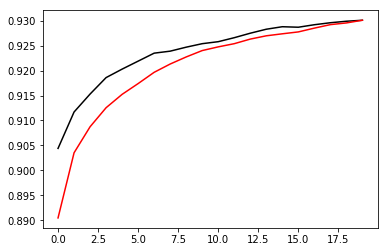

In [785]:
plt.plot(valid_accu_list, color='black', label='validation accuracy')
plt.plot(train_accu_list, color='red', label='train accuracy')
plt.show()

In [708]:
'''
    学习率是否合理？
        1. loss是否稳定下降
        2. validation是否稳定上升
    
    Is the learning rate reasonable?
        1. Whether the loss is steadily decreased
        2. Validation is rising steadily
'''
pass